In [78]:
# data sets 

import pandas as pd
import requests
from io import StringIO

# GitHub URL of the raw CSV file
url = "https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv"

# Fetch the content of the CSV file
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:

    csv_content = response.content.decode('utf-8')
    df = pd.read_csv(StringIO(csv_content))

    
else:
    print("Failed to fetch data from the URL:", url)


In [79]:
df.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
587,588,85,RL,74.0,8740,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,137000
890,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900
804,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
318,319,60,RL,90.0,9900,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,260000


In [80]:
#looking shape 
df.shape

(1460, 81)

### this is only about pearson's corelation so not doing any kind of feature engineering 

In [81]:
#checking null values 
df.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [82]:
str_columns_list = df.select_dtypes(include = ['object']).columns 
df.drop(columns= str_columns_list , inplace= True) #dropping str columns 

In [83]:
df.isnull().sum().sort_values(ascending  = False )


LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [84]:
#dropping null value columns which has null value greater than 60 percetange
mean_null = df.isnull().sum().mean()
#60 percentage 
df.isnull().mean().sample(5)



MiscVal         0.0
Fireplaces      0.0
YearBuilt       0.0
Id              0.0
BsmtHalfBath    0.0
dtype: float64

In [89]:
#removing null values less than 60 percentange of the data sets 
df.drop(columns= df.columns[df.isnull().mean() > 0.6], inplace = True  , axis = 1 )

In [90]:
(df.isnull().mean() > 0.6).sum()

0

In [92]:
#new shape 
df.shape 

(1460, 38)

plotting headmaps so show how many null values present in the datasets

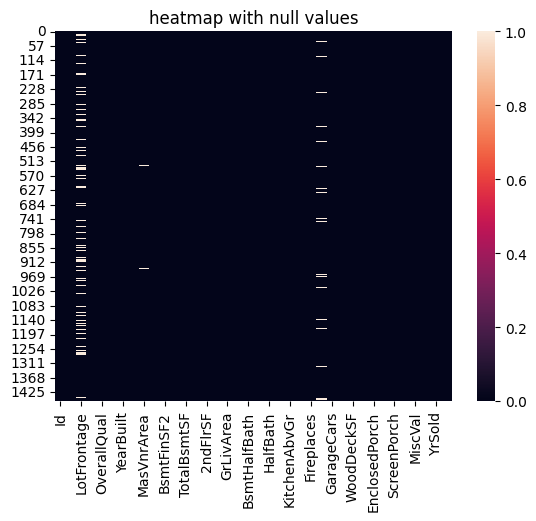

In [103]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.heatmap(df.isnull() )
plt.title('heatmap with null values')
plt.show()

In [107]:
# now drop rows which has null values
df.dropna(inplace  = True  , axis = 0 ) 
print("new shape is " , df.shape) 

new shape is  (1121, 38)


again plotting null values heatmap

<Axes: >

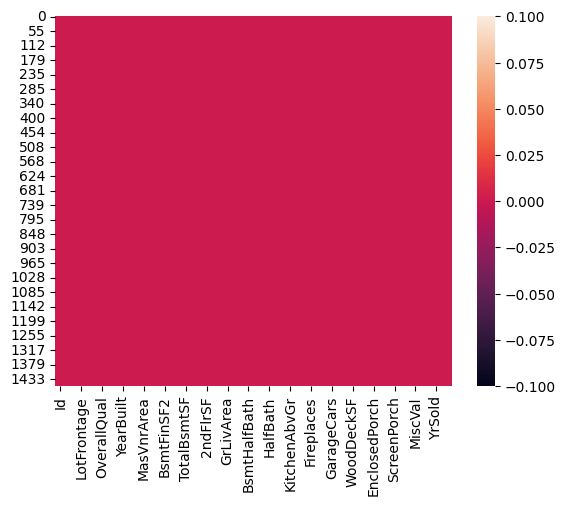

In [110]:
sns.heatmap(df.isnull()) # no null values 

### all cleared now using pearson's corelation 